[개발 주제: 꽃일 너비 예측 모델]  
- 데이터셋 : iris.csv  
  
- 피쳐/특성/데이터 : petal.length
- 타겟/정답/레이블 : petal.width

- 학습종류  : 지도학습 - 회귀
- 알고리즘 : 데이터셋 분석 후 결정

In [1]:
# [1-1] 모듈 로딩
from sklearn.linear_model import LinearRegression												# 머신러닝 알고리즘 모듈
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error	# 성능평가 모듈
from sklearn.model_selection import train_test_split											# 데이터셋 분리 모듈
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# [1-2] 데이터 분비

# iris 데이터
iris_df = pd.read_csv('../data/iris.csv', usecols=['petal.length', 'petal.width'])

display(iris_df)

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


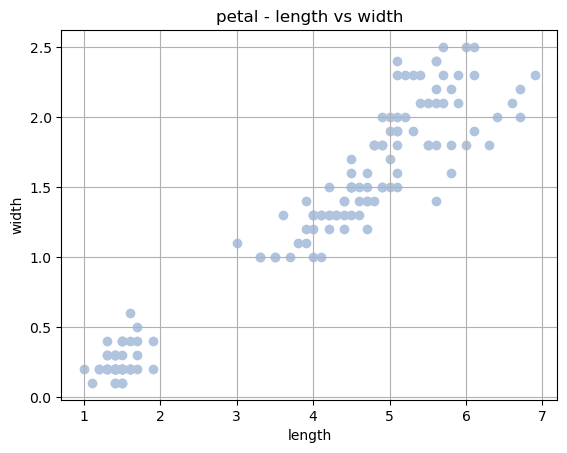

In [3]:
# [1-3] 탐색적 분석 - 시각화
length = iris_df['petal.length']
width = iris_df['petal.width']
plt.scatter(length, width, color='#B0C4DE')
plt.xlabel('length')
plt.ylabel('width')
plt.title('petal - length vs width')
plt.grid()
plt.show()

In [4]:
## [2-1] 데이터셋 준비 => 학습용, 검증용, 테스트용
# 학습용 : 규칙과 패턴 찾기 위해 사용되는 데이터셋
# 검증용 : 모델 학습 진행이 제대로 되고 있는지 확인용 데이터셋
# 테스트용 : 학습 완료 후 검사용 데이터셋

# 피쳐와 타겟 분리
featureDF = iris_df[['petal.length']] # 2차원 - 입력할 대상
targetSR = iris_df['petal.width'] 	  # 1차원 - 예측할 대상

# 차원, shape 확인
print(f'featureDF => {featureDF.ndim}D, {featureDF.shape}')
print(f'targetDF => {targetSR.ndim}D, {targetSR.shape}')

featureDF => 2D, (150, 1)
targetDF => 1D, (150,)


In [5]:
# 전체 데이터셋에서 학습용 / 테스트용 분리 (70:30 or 80:20)

# random_state=10 (numpy의 random seed와 동일)
# 학습용(train) : 테스트용(test) = 70:30
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.3, random_state=10)

# 학습용(train) : 검증용(val) = 80:20
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)

In [6]:
# [2-2] 선형회귀 알고리즘 객체 / 인스턴스 생성
plant_model = LinearRegression()

In [7]:
# [2-3] 학습 진행
plant_model.fit(x_train, y_train)

LinearRegression()

In [8]:
# [2-4] 선형식의 모델 파라미터 확인
print(f'기울시/가중치 : {plant_model.coef_}, 절편값 : {plant_model.intercept_}')

기울시/가중치 : [0.41311685], 절편값 : -0.35930924354622484


In [9]:
# [3-1] 학습 평가
# 예측값
pre_y = plant_model.predict(x_train)
print(f'예측값 : {pre_y}')

# 모델 적합도
score = plant_model.score(x_train, pre_y)
print(f'모델 적합도 : {score}')

# 오차 계산
rmse = root_mean_squared_error(x_train, pre_y)
print(f'오차 : {rmse}')

예측값 : [1.58233995 1.00397636 1.37578153 1.21053479 0.30167772 0.17774266
 0.21905435 1.4584049  2.16070354 0.26036603 2.40857365 1.87152175
 2.16070354 1.58233995 0.21905435 1.29315816 0.30167772 1.33446984
 1.78889838 1.95414512 1.74758669 1.9954568  1.49971658 1.95414512
 1.08659973 0.21905435 1.29315816 1.66496332 1.74758669 1.74758669
 0.26036603 1.49971658 1.12791142 0.3429894  1.1692231  1.25184647
 2.11939186 0.17774266 0.26036603 0.26036603 1.74758669 0.13643098
 2.11939186 1.54102827 1.25184647 0.21905435 0.88004131 2.2846386
 0.17774266 1.41709321 0.21905435 0.3429894  1.58233995 1.58233995
 1.74758669 1.95414512 0.17774266 0.3429894  0.26036603 1.87152175
 1.66496332 1.29315816 2.03676849 0.30167772 1.29315816 2.03676849
 0.05380761 2.24332691 1.78889838 0.26036603 0.26036603 1.95414512
 0.3429894  0.26036603 1.70627501 1.49971658 2.36726197 1.83021006
 1.33446984 1.91283343 1.00397636 0.30167772 1.70627501 1.49971658]
모델 적합도 : 1.0
오차 : 2.7738849861975114


In [10]:
# [3-2] 테스트 평가
# 예측값
pre_y = plant_model.predict(x_test)
print(f'예측값 : {pre_y}')

# 모델 적합도
score = plant_model.score(x_test, pre_y)
print(f'모델 적합도 : {score}')

# 오차 계산
rmse = root_mean_squared_error(x_test, pre_y)
print(f'오차 : {rmse}')

예측값 : [1.4584049  1.83021006 0.26036603 1.54102827 0.21905435 1.08659973
 1.66496332 1.33446984 0.26036603 1.49971658 1.49971658 1.74758669
 1.29315816 0.21905435 0.26036603 1.91283343 1.49971658 0.17774266
 0.26036603 0.13643098 2.07808017 1.95414512 1.62365164 0.42561277
 1.37578153 0.17774266 1.37578153 1.4584049  1.62365164 2.40857365
 1.54102827 1.41709321 2.03676849 1.74758669 1.70627501 0.21905435
 1.9954568  1.9954568  2.49119702 1.74758669 0.30167772 0.30167772
 1.25184647 0.17774266 1.58233995]
모델 적합도 : 1.0
오차 : 2.8011301524467513


In [11]:
# [3-3] 모델 성능 평가 : 검증 데티어가 필요함
# 결과값 : 0.0 ~ 1.0
# 분석 : 1.0에 가까울수록 성능이 좋음

score = plant_model.score(x_val, y_val)

print(f'모델 성능평가 점수 : {score}')

모델 성능평가 점수 : 0.9589642553409735


In [12]:
# [3-4] 손실 계산 : 검증용 데이터셋으로 예측값 추출 => 손실계산
pre_y = plant_model.predict(x_val)

# 오차의 제곱값 기준 (평균)
mse = mean_squared_error(y_val, pre_y)
# 오차의 절댓값 디준(평균)
mae = mean_absolute_error(y_val, pre_y)

print(mse)
print(mae)

0.0274316043661701
0.11830731076787963


In [13]:
# [4-1] 예측 서비스
# 임의의 데이터 생성
new_data = [[float(input('예측할 길이 입력 : '))]]

pre_width = plant_model.predict(new_data)
print(f'예상 너비 : {pre_width}')

예상 너비 : [2.11939186]


c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
